In [9]:
import heeps
import matplotlib.pyplot as plt
import astropy.io.fits as fits
%matplotlib widget


In [2]:
conf = dict(
    dir_current = '$HOME/heeps_metis',  # specify a directory
    f_phase = 'wavefront/COMPASS_201810_RandomWind_100screens_meters.fits',
    add_phase = False,
    nframes = 1,                      # number of SCAO phase screens selected
    cpu_count = 10,                     # number of physical CPUs
    mode = 'CVC',
)
conf = heeps.config.read_config(verbose=False, **conf)

In [3]:
conf = heeps.config.update_config(saveconf=True, verbose=True, **conf) 

Simulation config: band=L, mode=CVC
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   loading vortex back-propagation params
   vc_charge=2, ngrid=1024, diam_norm=1.0838, beam_ratio=0.2568
   npupil=285, pscale=5.4700 mas, lam=3.8112E-06 m
   hfov=1.1 arcsec (-> 51.74 lam/D)
   detector size (ndet)=403 (103.49 lam/D)



In [4]:
wf = heeps.pupil.pupil(savefits=True, verbose=True, **conf)

Entrance pupil: loaded from 'ELT_fullM1_feb2025.fits'
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾


Create single on-axis PSF
   apply vortex phase mask
   apply Lyot stop: circ_ext/int=[False, False], ls_dRext/int/spi=[0.0477, 0.04, 0.0275], ls_misalign=None
   extract PSF on the detector: ndet=403


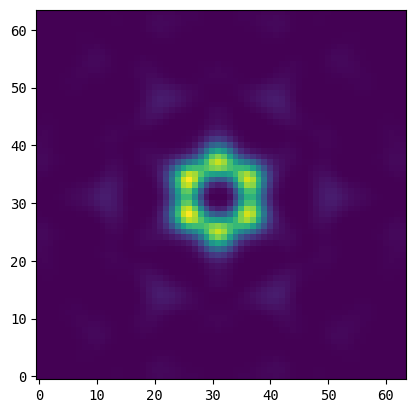

In [5]:
psf = heeps.wavefront.propagate_one(wf, onaxis=True, savefits=False, verbose=True, **conf)

psf_c = heeps.util.img_processing.crop_img(psf, 64)
plt.figure()
plt.imshow(psf_c)

   apply vortex phase mask
   apply Lyot stop: circ_ext/int=[False, False], ls_dRext/int/spi=[0.0477, 0.04, 0.0275], ls_misalign=None


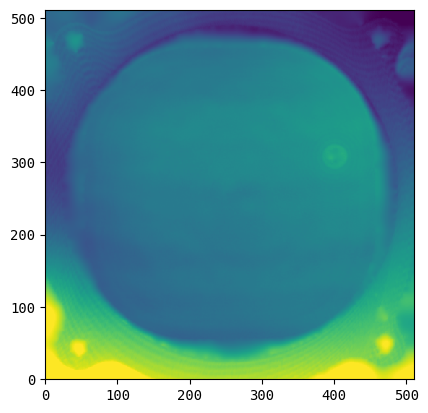

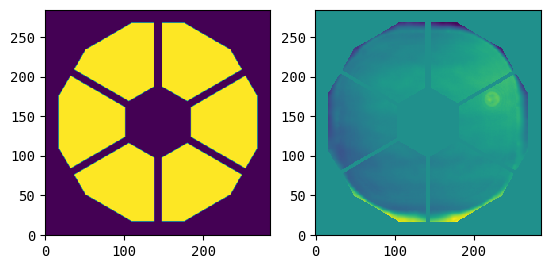

In [10]:
f_lyot_phase = '/Users/orban/Projects/METIS/3.SIMULATIONS/coll_wfe.fits'
phase = fits.getdata(f_lyot_phase)

plt.figure()
plt.imshow(phase)

from heeps.optics import apodizer, fp_mask, lyot_stop, detector
from copy import deepcopy

verbose=True
wf1 = deepcopy(wf)
wf1 = fp_mask(wf1, verbose=verbose, **conf) # focal-plane mask (onaxis only)
# wf1 = lyot_stop(wf1, verbose=verbose, **conf)
conf['apply_ls']=False
ls = lyot_stop(wf1, verbose=verbose, f_lyot_stop_phase=f_lyot_phase, **conf)


# psf_a = detector(wf1, verbose=verbose, **conf)

plt.figure()
plt.subplot(121)
plt.imshow(heeps.util.img_processing.crop_img(np.abs(ls), 285))
plt.subplot(122)
plt.imshow(heeps.util.img_processing.crop_img(np.angle(ls), 285))

   apply Lyot stop: circ_ext/int=[False, False], ls_dRext/int/spi=[0.0477, 0.04, 0.0275], ls_misalign=None
   extract PSF on the detector: ndet=403


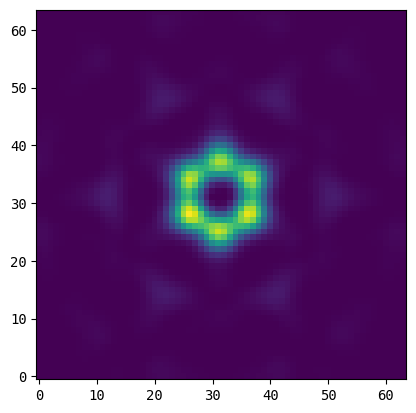

In [11]:
conf['apply_ls']=True
ls = lyot_stop(wf1, verbose=verbose, f_lyot_stop_phase=f_lyot_phase, **conf)
psf_a = detector(wf1, verbose=verbose, **conf)
psf_a_c = heeps.util.img_processing.crop_img(psf_a,64)
plt.figure()
plt.imshow(psf_a_c)

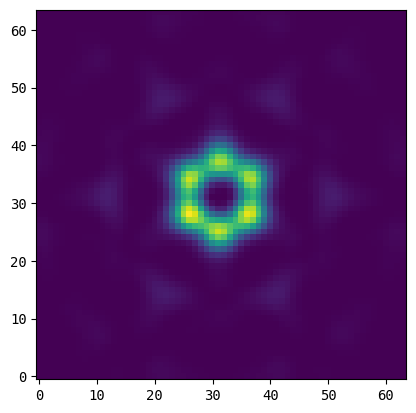

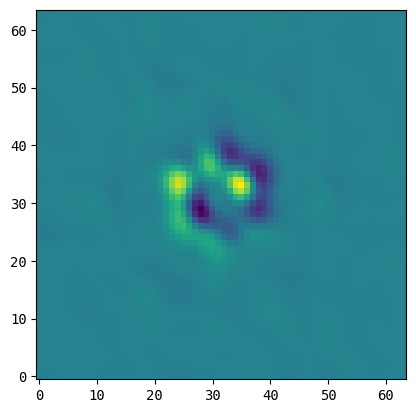

In [ ]:
plt.figure()
plt.imshow(psf_a_c / np.max(psf_a_c))

plt.figure()
plt.imshow((psf_c - psf_a_c)/ np.max(psf_a_c))